<a href="https://colab.research.google.com/github/ritzi12/NLP-PRODUCT-REVIEW-RATING/blob/main/NLP_PRODUCT_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRODUCT RATING PREDICTIONS USING NLP AND SENTIMENT ANALYSIS**

This a classic NLP problem involving analysis of product reviews or customer reviews to predict the rating or understand the sentiment of customer with regards to poduct.

### DATASET
This dataset contains Amazon Reviews of Toys Categories posted by PromptCloud on Kaggle.[Click to view the kaggle dataset](https://www.kaggle.com/PromptCloudHQ/toy-products-on-amazon)

### OBJECTIVE
Our purpose is to predict the products review ratings based on the customer reviews. 

### APPROACH SUMMARY
In this I have tried to use different use cases and combination of approaches and checked which combination of features gives best predictions. Following approaches were used in various combinations:

1. Word Count based metrics on reviews 
2. Using Bag of Words approach through TF-IDF (its is a conventional old form of NLP technique which is still used and effective)
3. Sentiment Analysis features using TextBlob

For NLP 'nltk' library of python is popularly used and useful. 


## LOAD PACKAGES


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import stat

## LOAD DATASET

Since the dataset is large in size uploading dataset in google drive folder and eventually mounting the google drive in the notebook is a fast option to avoid repeated uploading of dataset manually in google colab for each session. 

In [ ]:
#This part can be skipped if you upload file manually in your directory
from google.colab import drive
import os
drive.mount('/content/drive')

os.chdir("drive/My Drive/Colab Notebooks")
os.listdir()

While reading dataset some rows have issues with quotes not ended properly resulting in EOF error . Using  **`escapechar`** argument of`read_csv` helps to escape unwanted delimiters and quotes.

In [ ]:
input_data=pd.read_csv('amazon_co-ecommerce_sample.csv',error_bad_lines=False,escapechar='\\') #quoting=csv.QUOTE_NONE --removes quote characters for strings gives wrong result

b'Skipping line 277: expected 17 fields, saw 20\nSkipping line 291: expected 17 fields, saw 36\nSkipping line 362: expected 17 fields, saw 32\nSkipping line 2003: expected 17 fields, saw 2025\nSkipping line 2094: expected 17 fields, saw 18\nSkipping line 2099: expected 17 fields, saw 20\nSkipping line 2115: expected 17 fields, saw 30\nSkipping line 2120: expected 17 fields, saw 24\nSkipping line 2150: expected 17 fields, saw 22\nSkipping line 2161: expected 17 fields, saw 28\nSkipping line 2173: expected 17 fields, saw 20\nSkipping line 2484: expected 17 fields, saw 35\nSkipping line 2515: expected 17 fields, saw 35\nSkipping line 2579: expected 17 fields, saw 18\nSkipping line 3036: expected 17 fields, saw 24\nSkipping line 3093: expected 17 fields, saw 18\nSkipping line 3114: expected 17 fields, saw 24\nSkipping line 4368: expected 17 fields, saw 18\nSkipping line 4388: expected 17 fields, saw 34\nSkipping line 4437: expected 17 fields, saw 18\nSkipping line 4447: expected 17 fields,

In [ ]:
display(input_data)
input_data.shape

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9966,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9967,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop R

(9970, 17)

We observe each row consist of 17 columns containing various features. Our target variable is 'average_review_rating'

## EDA

1. Remove unwanted duplicate columns
2. check for null or missing values and handle them
3. 

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      9970 non-null   object 
 1   product_name                                 9970 non-null   object 
 2   manufacturer                                 9963 non-null   object 
 3   price                                        8538 non-null   object 
 4   number_available_in_stock                    7472 non-null   object 
 5   number_of_reviews                            9952 non-null   object 
 6   number_of_answered_questions                 9207 non-null   float64
 7   average_review_rating                        9952 non-null   object 
 8   amazon_category_and_sub_category             9292 non-null   object 
 9   customers_who_bought_this_item_also_bought   8909 non-null   object 
 10  

#### REMOVE UNWANTED COLUMN
We observe **product_description** and **description** having same values so remove one of them. 

In [ ]:
input_data[['product_information','product_description','description']].loc[20].values


array(['Technical Details Item Weight9 g Product Dimensions12 x 5.4 x 3.4 cm Manufacturer recommended age:10 years and up Item model numberPR30495 Scale1::87 Track Width/GaugeHO Batteries Required?No Batteries Included?No \xa0\xa0 Additional Information ASINB001SFOANY Best Sellers Rank 654,666 in Toys & Games (See top 100) #660 in\xa0Toys & Games > Model Trains & Railway Sets > Rail Vehicles > Wagons #1096 in\xa0Toys & Games > Model Trains & Railway Sets > Rail Vehicles > Trains Shipping Weight9 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available29 July 2010 \xa0\xa0 Feedback \xa0Would you like to update product info or give feedback on images?',
       'Suitable for the following scale(s): HO Scale',
       'Suitable for the following scale(s): HO Scale'], dtype=object)

In [ ]:
#dropping product description col
input_data.drop(axis=1,columns=['product_description'],inplace=True)

#### CHECK FOR MISSING VALUES PERCENTAGE

In [ ]:

missing_df= input_data.isnull().sum()/input_data.shape[0]

display("Column Name                                   % of missing values",missing_df.sort_values())

'Column Name                                   % of missing values'

uniq_id                                        0.000000
product_name                                   0.000000
manufacturer                                   0.000702
number_of_reviews                              0.001805
average_review_rating                          0.001805
customer_reviews                               0.002106
product_information                            0.005817
description                                    0.065296
amazon_category_and_sub_category               0.068004
number_of_answered_questions                   0.076530
customers_who_bought_this_item_also_bought     0.106419
price                                          0.143631
number_available_in_stock                      0.250552
items_customers_buy_after_viewing_this_item    0.306720
sellers                                        0.309127
customer_questions_and_answers                 0.908726
dtype: float64

In [ ]:
#drop rows having customer review as null
input_data.dropna(axis=0,subset=['customer_reviews'],inplace=True)

Process the target variable **'average_review_rating'** since it has text and string values so parsing it into numeric value using regex and type conversions

In [ ]:
#Convert average review ratings
targetVar = input_data['average_review_rating']
targetVar

0       4.9 out of 5 stars
1       4.5 out of 5 stars
2       3.9 out of 5 stars
3       5.0 out of 5 stars
4       4.7 out of 5 stars
               ...        
9965    5.0 out of 5 stars
9966    4.0 out of 5 stars
9967    5.0 out of 5 stars
9968    5.0 out of 5 stars
9969    4.5 out of 5 stars
Name: average_review_rating, Length: 9949, dtype: object

We can use a number of str functions on pandas series .

In [ ]:
targetVar=targetVar.str.replace(" out of 5 stars","")
targetVar

0       4.9
1       4.5
2       3.9
3       5.0
4       4.7
       ... 
9965    5.0
9966    4.0
9967    5.0
9968    5.0
9969    4.5
Name: average_review_rating, Length: 9949, dtype: object

We extract a subset of some useful features to focus our further analysis . Apart from customer reviews we can analyse price ,number of reviews and description to find any meaning ful features to be used in our model. A products description can also play a role in product rating. 

In [ ]:
useful_features=input_data[['customer_reviews','number_of_reviews','description','price']]
useful_features=useful_features.assign(average_review_rating=targetVar)
useful_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9949 entries, 0 to 9969
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_reviews       9949 non-null   object
 1   number_of_reviews      9949 non-null   object
 2   description            9302 non-null   object
 3   price                  8521 non-null   object
 4   average_review_rating  9949 non-null   object
dtypes: object(5)
memory usage: 466.4+ KB


Removing accented euro symbol and extra decimals from price column

In [ ]:
useful_features['price']= useful_features['price'].str.replace("[^0-9\.]","",regex=True) #replaces everything except numbers and dots
useful_features['price']=useful_features['price'].str.extract('(^[0-9]*[\.]{0,1}[0-9]*)')# remove extra decimals such as 5.00.99 gets converted to 5 using match groups
useful_features['price']

0        3.42
1       16.99
2        9.99
3       39.99
4       32.19
        ...  
9965    22.95
9966    39.99
9967    43.99
9968    49.81
9969    21.20
Name: price, Length: 9949, dtype: object

In [ ]:
useful_features['number_of_reviews']= useful_features['number_of_reviews'].str.replace(",","")#remove commas
useful_features['number_of_reviews']

0       15
1        2
2       17
3        1
4        3
        ..
9965     3
9966     1
9967     1
9968     1
9969    11
Name: number_of_reviews, Length: 9949, dtype: object

In [ ]:
#Conversion into numeric dtypes
corr_df=useful_features[['price','number_of_reviews','average_review_rating']]
corr_df= corr_df.astype('float')
corr_df.dtypes

price                    float64
number_of_reviews        float64
average_review_rating    float64
dtype: object

#### CORRELATION ANALYSIS AND DISTRIBUTION
Checking if there's any correlation between average review ratings and number of reviews, price.

We observe there is negligible correlation so we can drop these features.

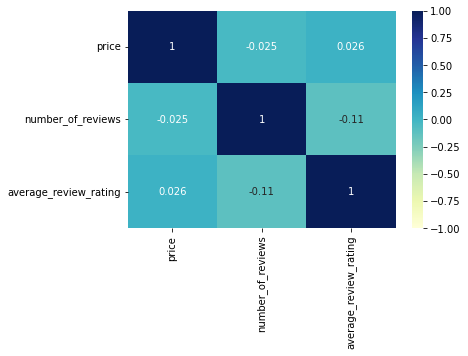

In [ ]:

cor_mat=corr_df.corr()
sns.heatmap(cor_mat,annot=True,cmap='YlGnBu',center=0,vmin=-1,vmax=1)
#no correlations

Checking distribution of ratings and we see it is imbalanced data set with majority of the ratings greater than 4 and 5 having maximum frequency

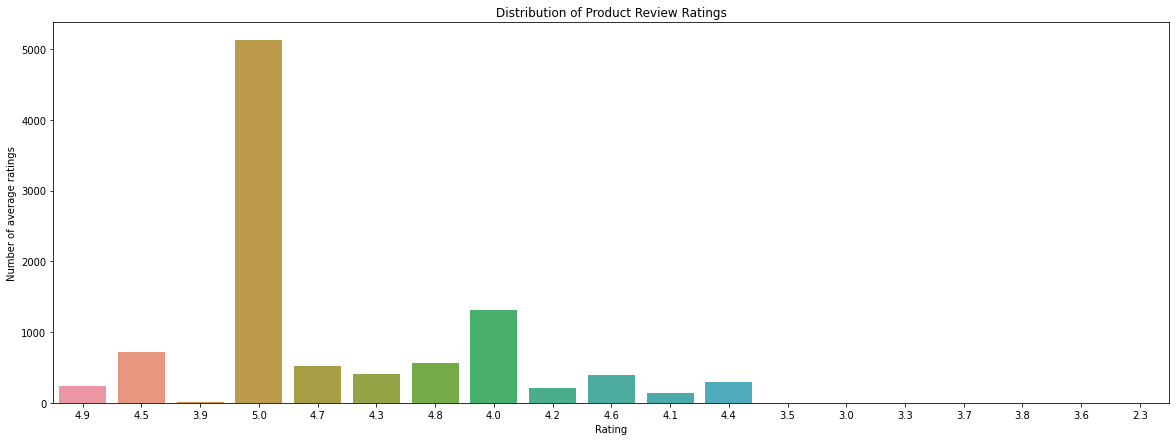

In [ ]:
# Visualize the rating distribution #imbalanced
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=useful_features['average_review_rating'])
ax.set(title="Distribution of Product Review Ratings", xlabel="Rating", ylabel="Number of average ratings")
plt.show()

Combing description and review columns

In [ ]:
useful_features['description']=useful_features['description'].apply(str)
useful_features['description'].str.replace('nan'," ") #replacing null description with empty space

0       Product Description Hornby 2014 Catalogue Box ...
1       Size Name:Large FunkyBuys® Large Christmas Hol...
2       BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...
3       Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...
4       Product Description Hornby RailRoad 0-4-0 Gild...
                              ...                        
9965    DC 66 Batman Classic TV Series 6 Inch Riddler ...
9966                                                     
9967    *Includes 1x Badge with holder and chain *High...
9968    Designed by Ed BenesIt's here - the third seri...
9969                                                     
Name: description, Length: 9949, dtype: object

In [ ]:
text_features=(useful_features['customer_reviews'].map(str)+" "+useful_features['description']).apply(str)
text_features.apply(lambda row:row.strip()) #stripping extra space
display(text_features)

0       Worth Buying For The Pictures Alone (As Ever) ...
1       Four Stars // 4.0 // 18 Dec. 2015 // By\n    \...
2       **Highly Recommended!** // 5.0 // 26 May 2015 ...
3       I love it // 5.0 // 22 July 2013 // By\n    \n...
4       Birthday present // 5.0 // 14 April 2014 // By...
                              ...                        
9965    Realistic // 5.0 // 31 Mar. 2014 // By\n    \n...
9966    ... what I see my grandson us going to have fu...
9967    Five Stars // 5.0 // 18 Dec. 2015 // By\n    \...
9968    The best sculpt in a while // 5.0 // 13 May 20...
9969    Gold leader // 5.0 // 31 Aug. 2015 // By\n    ...
Length: 9949, dtype: object

## TEXT PREPROCESSING

In [ ]:
!pip install contractions
#!pip install textsearch
#!pip install tqdm


     |████████████████████████████████| 284 kB 4.9 MB/s 
     |████████████████████████████████| 321 kB 46.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=5c3f2851217cf4d9f97c88fa43c2fa1e615ab843273e93fcaa89feccdc01cf99
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


How contractions work.

In [ ]:
import contractions

contractions.fix('I didn\'t like this t-shirt Aug.')



'I did not like this t-shirt august'

Steps in this preprocessor function
1. case Conversion 
2. Fix contractions
3. remove punctuations ,space ,unnecessary terms
4. Stopwords removal

Stemming step was skipped since it removes lot of semantic information by chopping off words 


In [ ]:
import nltk
import contractions
import re

# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no') 
stop_words.remove('not')
stop_words.remove('but')
stop_words.remove('very')
#remove words related to months as they don't contribute to product review analysis
stop_words.append('january')
stop_words.append('february')
stop_words.append('march')
stop_words.append('april')
stop_words.append('may')
stop_words.append('june')
stop_words.append('july')
stop_words.append('august')
stop_words.append('september')
stop_words.append('october')
stop_words.append('november')
stop_words.append('december')
stop_words.append('\n') #newlines character

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    #document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

## SPLIT DATASET

In [ ]:
text_feature_df=pd.DataFrame(text_features,columns=['Review_Desc'])

In [ ]:
text_feature_df['Clean Review'] = stp(text_features.values)

text_feature_df.shape

(9949, 2)

In [ ]:
text_feature_df[["Clean Review","Review_Desc"]].loc[1].values

array(['four stars kenneth bell very happy communication funkybuys five stars moosixty great buy size name large funkybuys large christmas holiday express festive train set si ty toy light sounds battery operated smoke',
       'Four Stars // 4.0 // 18 Dec. 2015 // By\n    \n    kenneth bell\n  \n on 18 Dec. 2015 // Very happy with the communication with funkybuys | Five Stars // 5.0 // 14 Jan. 2016 // By\n    \n    moosixty\n  \n on 14 Jan. 2016 // Great buy. Size Name:Large FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke'],
      dtype=object)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_feature_df[['Clean Review']], useful_features['average_review_rating'], random_state=42,test_size=0.2)
X_train.shape, X_test.shape

((7959, 1), (1990, 1))

In [ ]:
X_train

,Clean Review
4067,knight mrs c davey cobb unfortunately knight n...
720,brilliant chelsea fan amazon customer son love...
814,stunning model hennessey venom gt people found...
5085,aloa sept susan davison sept goodwin item used...
9500,robby great product sept mr j c sheppard sept ...
...,...
5748,ticket furniss wanted one exactly remeber real...
5205,outstanding little game damien cos cards make ...
5404,perfect rachael b bought boyfriend big iron ma...
865,stunning model lamborghini aventador lp people...


In [ ]:
#CHECKING WORD CLOUD OF TEXT
reviewtxt=str(X_train['Clean Review'].values)

reviewtxt

"['knight mrs c davey cobb unfortunately knight not last even day shield came sword snapped within couple hours big disappointment looking brands future great gregorysgirl brought go sons castle rd birthday loves good heavy duty material wish came better presented gr denise noone sharpe arrived early new lovely son love hours hours fun playing little figures papo range comprises kinds people animals creatures included papo toy range wild animals farm animals horses equestrian dinosaurs fantasy world knights historical figures pirates fairytale worlds much great item papo knights knight red armour recommnded ages'\n 'brilliant chelsea fan amazon customer son loved cute huge chelsea fan probably stay year not christmas five stars lily n cool advend caleder I using teddy everyday since luca five stars amazon customer arrived time expected fabric snowman wearing chelsea hat logo body snowman advent calendar numbered pockets fill sweets goodies also little fabric football place inside pocke

In [ ]:
#import stylecloud
#stylecloud.gen_stylecloud('speech.txt',icon_name='fab fa-amazon',palette='cartocolors.qualitative.Pastel_3',)

In [ ]:
from wordcloud import WordCloud
from PIL import Image
image = Image.open('amazon.png')
image_grey=image.convert('L')
char_mask=np.array(image_grey)
char_mask[90]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 243,  77,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 251, 255, 255, 255, 255, 255, 25

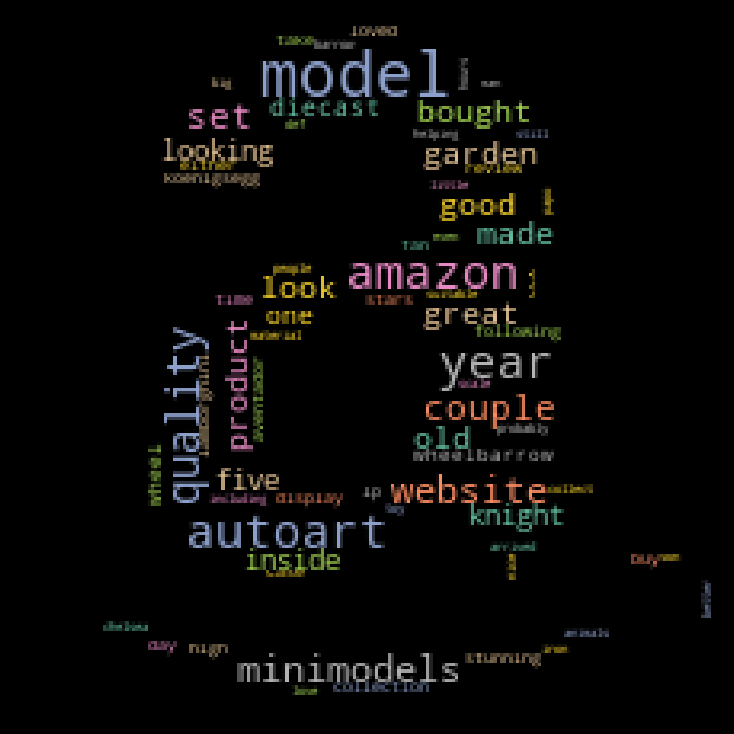

In [ ]:
# Generate wordcloud
cloud=WordCloud(width=6000,height=3000,background_color='black',collocations=False,colormap='Set2',mask=char_mask).generate(reviewtxt)
#PLot the cloud
plt.figure(figsize=[10,15],facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#Save cloud file
cloud.to_file('amazon_cloud2.png')

## TEXT REPRESENTATION

This step involves converting words into numeric vectors through various word embedding techniques. I have used the most common TF-IDF technique which is a discrete word embedding techinique based on count or freq of word in document and nomalized by inverse document frequency.



### 1.WORD COUNT AND CHARACTERISTICS BASED FEATURES

In [ ]:
X_train['char_count'] = X_train['Clean Review'].apply(len)
X_train['word_count'] = X_train['Clean Review'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
#X_train['punctuation_count'] = X_train['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
#X_train['title_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
#X_train['upper_case_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


Creating Parts of Speech frequency distribution of reviews. It basically involves counting the number of nouns ,adjectives,verb etc. in each rows

In [ ]:
#Tags associated with each family
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}


In [ ]:
#main function
def pos_freq_feature(df):
    wordlist=df['Clean Review'].apply(lambda x:nltk.word_tokenize(x))
    tagged=wordlist.apply(lambda row:nltk.pos_tag(row))
    df['noun_count'] = tagged.apply(lambda x: check_pos_tag(x, 'noun'))
    df['pron_count'] = tagged.apply(lambda x: check_pos_tag(x, 'pron'))
    df['verb_count'] = tagged.apply(lambda x: check_pos_tag(x, 'verb'))
    df['adj_count'] = tagged.apply(lambda x: check_pos_tag(x, 'adj'))
    df['adv_count'] = tagged.apply(lambda x: check_pos_tag(x, 'adv'))
    
    return df


# Function to update count
def check_pos_tag(row, flag):
    cnt = 0
    try:
        for w,p in row:
            if p in pos_family[flag]:
                cnt+=1
    except:
        pass
    return cnt    

In [ ]:
#Pos based features
X_train=pos_freq_feature(X_train)
display(X_train)

,Clean Review,char_count,word_count,word_density,noun_count,pron_count,verb_count,adj_count,adv_count
4067,knight mrs c davey cobb unfortunately knight n...,616,92,6.623656,42,0,22,22,5
720,brilliant chelsea fan amazon customer son love...,393,61,6.338710,27,1,9,16,4
814,stunning model hennessey venom gt people found...,1227,173,7.051724,78,0,43,30,12
5085,aloa sept susan davison sept goodwin item used...,243,39,6.075000,22,0,8,7,1
9500,robby great product sept mr j c sheppard sept ...,381,61,6.145161,30,0,10,11,7
...,...,...,...,...,...,...,...,...,...
5748,ticket furniss wanted one exactly remeber real...,132,22,5.739130,13,0,4,3,1
5205,outstanding little game damien cos cards make ...,3961,622,6.357945,271,7,130,124,60
5404,perfect rachael b bought boyfriend big iron ma...,176,28,6.068966,17,0,3,8,0
865,stunning model lamborghini aventador lp people...,1373,192,7.113990,91,0,44,33,13


### 2.WORD EMBEDDING USING TF-IDF 1-grams

Basically creating a 1 -Grams Bg of Words model using TFIDF Vectorizer.

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer


# Use TF-IDF to vectorize
tfidf_vec = TfidfVectorizer(ngram_range=(1, 1)) # Range of tokens into consideration
tfidf_train = tfidf_vec.fit_transform(X_train['Clean Review'])
tfidf_train_frame= pd.DataFrame(tfidf_train.toarray(),columns=tfidf_vec.get_feature_names())
display(tfidf_train_frame)

,aa,aaa,aaaa,aaaaarghmazing,aaaah,aaaarrrrrr,aaahhh,aaar,aabirch,aae,aaf,aaghhhhh,aah,aall,aand,aanrader,aaoxyiyhsus,aardvark,aaron,aaronricks,aat,aauthentic,aav,ab,abandon,abandoned,abarth,abate,abbe,abbey,abbot,abbott,abbreviated,abbreviation,abbreviations,abbs,abbsolutly,abbu,abby,abc,...,zozo,zpu,zq,zr,zrav,zrqhs,zs,zsssssk,zte,zts,zu,zugu,zuhra,zuk,zukovski,zulfiqar,zum,zuma,zumbie,zunbrown,zur,zurafa,zurg,zusatz,zuvio,zuvor,zuzana,zvezda,zwalf,zwar,zwarte,zwei,zx,zxxxx,zygon,zygons,zymakes,zymer,zyudenshi,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.SENTIMENT FEATURES USING TEXTBLOB

We try to find out the sentiment of reviews using TextBlob which gives two parameters.
* Polarity: -1 to 1 where -1 :negative,0:neutral;1:positve

* Subjectivity: 0 to 1 where 0 means objective and 1 means highly subjective 

In [ ]:
#Building Sentiment Analysis Features
import textblob

textblob.TextBlob('Earth is revolving').sentiment # highly objective statement 

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
#Sample example
textblob.TextBlob('I hate you!!').sentiment

Sentiment(polarity=-1.0, subjectivity=0.9)

In [ ]:
x_train_snt_obj = X_train['Clean Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

X_train

,Clean Review,char_count,word_count,word_density,noun_count,pron_count,verb_count,adj_count,adv_count,Polarity,Subjectivity
4067,knight mrs c davey cobb unfortunately knight n...,616,92,6.623656,42,0,22,22,5,0.155203,0.420853
720,brilliant chelsea fan amazon customer son love...,393,61,6.338710,27,1,9,16,4,0.295312,0.731250
814,stunning model hennessey venom gt people found...,1227,173,7.051724,78,0,43,30,12,0.310387,0.570347
5085,aloa sept susan davison sept goodwin item used...,243,39,6.075000,22,0,8,7,1,0.800000,0.750000
9500,robby great product sept mr j c sheppard sept ...,381,61,6.145161,30,0,10,11,7,0.325833,0.569167
...,...,...,...,...,...,...,...,...,...,...,...
5748,ticket furniss wanted one exactly remeber real...,132,22,5.739130,13,0,4,3,1,0.333333,0.433333
5205,outstanding little game damien cos cards make ...,3961,622,6.357945,271,7,130,124,60,0.055033,0.496724
5404,perfect rachael b bought boyfriend big iron ma...,176,28,6.068966,17,0,3,8,0,0.241667,0.463889
865,stunning model lamborghini aventador lp people...,1373,192,7.113990,91,0,44,33,13,0.299333,0.563420


In [ ]:
X_train_senti=X_train[['Polarity','Subjectivity']].reset_index(drop=True)
X_train_senti
tf_sent_train=pd.concat([tfidf_train_frame,X_train_senti],axis=1,ignore_index=True)
tf_sent_train.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42540,42541,42542,42543,42544,42545,42546,42547,42548,42549,42550,42551,42552,42553,42554,42555,42556,42557,42558,42559,42560,42561,42562,42563,42564,42565,42566,42567,42568,42569,42570,42571,42572,42573,42574,42575,42576,42577,42578,42579
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155203,0.420853
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295312,0.731250
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310387,0.570347
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.750000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325833,0.569167


In [ ]:
from  scipy.sparse import csr_matrix
 
sparse_senti=csr_matrix(tf_sent_train)


In [ ]:
type(sparse_senti)
sparse_senti

<7959x42580 sparse matrix of type '<class 'numpy.float64'>'
	with 676193 stored elements in Compressed Sparse Row format>

## ML MODEL BUILDING 

The following cases and approaches were used :
4 Experiments/Cases were considered they are:
1. Word count plus Sentiment Features(word counts chararactercounts,pos tag counts etc...)
2. Only TF-IDF 1 Grams features(word embeddings)
3. Only Sentiment Analysis Features from TextBlob(Polarity and Subjectivity)
4. Sentiment Analysis Features plus TF-IDF 

For Each of the above use cases I have used two ML Predictor Algorithms 
* KNN Regressor
* XGB Regressor

Both of them have good prediction performances in terms of predictions and both are non -parametric methods .

For validating the models we will use corss validation scores on the train set with 5 folds.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score

### EXPERIMENT 1: Using  Text Count based Feature And Sentiment Analysis


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
# Define the model
knn = KNeighborsRegressor()
# Create a dictionary of all values to be tested for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 35)}
# Use grid search to test all values for n_neighbors
model1 = GridSearchCV(knn, param_grid, cv=5)

In [ ]:
y_train=y_train.astype('float64')
y_train.dtypes

dtype('float64')

In [ ]:
word_train=X_train.drop(axis=1,columns=['Clean Review']).astype('float')
word_train.dtypes


char_count      float64
word_count      float64
word_density    float64
noun_count      float64
pron_count      float64
verb_count      float64
adj_count       float64
adv_count       float64
Polarity        float64
Subjectivity    float64
dtype: object

In [ ]:
# Fit KNN model to data
model1.fit(word_train,y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Check top performing n_neighbors value
model1.best_params_

{'n_neighbors': 34}

In [ ]:
# Check cross validation scores and their mean value
cv1 = cross_val_score(model1, word_train, y_train, cv=5)
print(cv1)
print('Mean cross validation scores: {}'.format(np.mean(cv1)))

[0.06509211 0.06222369 0.08313127 0.02878207 0.05847192]
Mean cross validation scores: 0.059540210679683514


In [ ]:
import xgboost as xgb

# Fit XGB model to data
model2 = xgb.XGBRegressor()

In [ ]:
model2.fit(word_train, y_train)

[02:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Check cross validation scores and their mean value
cv2 = cross_val_score(model2, word_train, y_train, cv=5)
print(cv2)
print('Mean cross validation scores: {}'.format(np.mean(cv2)))

[02:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.15774007 0.11096177 0.13304798 0.09832463 0.13974826]
Mean cross validation scores: 0.12796454188981482


### EXPERIMENT 2: Using  1-Grams Bag of Words TF-IDF 

In [ ]:
# Fit KNN model to data
model3 = GridSearchCV(knn, param_grid, cv=5)
model3.fit(tfidf_train,y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Check cross validation scores and their mean value
cv3 = cross_val_score(model3, tfidf_train, y_train, cv=5)
print(cv3)
print('Mean cross validation scores: {}'.format(np.mean(cv3)))

[0.09662788 0.0870025  0.09490181 0.07753424 0.08625897]
Mean cross validation scores: 0.08846507938708918


In [ ]:
model4 = xgb.XGBRegressor()
model4.fit(tfidf_train, y_train)

[03:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Check cross validation scores and their mean value
cv4 = cross_val_score(model4, tfidf_train, y_train, cv=5)
print(cv4)
print('Mean cross validation scores: {}'.format(np.mean(cv4)))

[03:05:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:05:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:05:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.37203549 0.34482861 0.33357941 0.3736086  0.31415015]
Mean cross validation scores: 0.3476404515771273


### EXPERIMENT 3: Using  Sentiment Analysis of TextBlob 

In [ ]:
#Knn 
model5 = GridSearchCV(knn, param_grid, cv=5)
model5.fit(X_train[['Polarity','Subjectivity']],y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model5.best_params_

{'n_neighbors': 34}

In [ ]:
cv5=cross_val_score(model5,X_train[['Polarity','Subjectivity']],y_train,cv=5)
print(cv5)
print('Mean cross validation score :',np.mean(cv5))

[0.05085389 0.0385477  0.03407048 0.02989672 0.05654994]
Mean cross validation score : 0.041983746582985294


In [ ]:
#XGB 
model6 = xgb.XGBRegressor()
model6.fit(X_train[['Polarity','Subjectivity']], y_train)

[03:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
cv6=cross_val_score(model6,X_train[['Polarity','Subjectivity']],y_train,cv=5)
print(cv6)
print('Mean cross validation score :',np.mean(cv6))

[03:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.05982052 0.03791413 0.0468605  0.04257613 0.0799973 ]
Mean cross validation score : 0.05343371711580443


In [ ]:
model7 = GridSearchCV(knn, param_grid, cv=5)

model7.fit(sparse_senti,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### EXPERIMENT 4: Using TFIDF and Sentiment Analysis 

In [ ]:
cv7=cross_val_score(model7,sparse_senti,y_train,cv=5)
print(cv7)
print('Mean cross validation score :',np.mean(cv7))

[0.09927397 0.10508492 0.11072419 0.1088233  0.1159277 ]
Mean cross validation score : 0.10796681462930355


In [ ]:
model8 = xgb.XGBRegressor()
model8.fit(sparse_senti, y_train)

[05:55:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
cv8=cross_val_score(model8,sparse_senti,y_train,cv=5)
print(cv8)
print('Mean cross validation score :',np.mean(cv8))

[05:56:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.37821546 0.34262992 0.32838319 0.38471096 0.33040671]
Mean cross validation score : 0.3528692489542857


In [ ]:
knn={'word+sentiment':np.mean(cv1),'tfidf-1gram_only':np.mean(cv3),'only_sentiment':np.mean(cv5)}
xgb_reg={'word+sentiment':np.mean(cv2),'tfidf-1gram_only':np.mean(cv4),'only_sentiment':np.mean(cv6)}
knn

{'only_sentiment': 0.041983746582985294,
 'tfidf-1gram_only': 0.08846507938708918,
 'word+sentiment': 0.059540210679683514}

In [ ]:
cross_val_df=pd.DataFrame([knn,xgb_reg],index=['knn','xgb_reg'])
cross_val_df=cross_val_df.transpose()
cross_val_df

,knn,xgb_reg
word+sentiment,0.059540,0.127965
tfidf-1gram_only,0.088465,0.347640
only_sentiment,0.041984,0.053434


## PREDICTION ON TEST DATA

In [ ]:
#Create  text features 

X_test['char_count'] = X_test['Clean Review'].apply(len)
X_test['word_count'] = X_test['Clean Review'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)

In [ ]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 2943 to 452
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Clean Review  1990 non-null   object 
 1   char_count    1990 non-null   int64  
 2   word_count    1990 non-null   int64  
 3   word_density  1990 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 77.7+ KB


In [ ]:
#Create POS Features
X_test=pos_freq_feature(X_test)
display(X_test)

,Clean Review,char_count,word_count,word_density,noun_count,pron_count,verb_count,adj_count,adv_count
2943,five stars margaret girvan job no complains pe...,138,24,5.520000,14,0,3,4,0
7420,but great gift puzzle lot harder thought would...,308,43,7.000000,22,0,5,12,1
7152,brilliant little item reviews spot gillm bough...,2726,423,6.429245,199,0,69,91,47
1259,five stars mary keep grandkids amused hama iro...,287,42,6.674419,21,0,9,9,0
3449,fab value money nice large sturdy looking mrs ...,480,76,6.233766,35,1,12,19,5
...,...,...,...,...,...,...,...,...,...
5667,five stars lynne roberts made scenery look bet...,98,16,5.764706,6,0,3,3,2
6634,five stars marie maynard good quality good sep...,127,20,6.047619,7,0,3,5,2
3647,fantastic mid range steam engine amazon custom...,436,66,6.507463,36,0,13,10,4
5800,cv people found following review helpful super...,267,41,6.357143,25,0,7,6,2


In [ ]:
x_test_snt_obj = X_test['Clean Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

X_test

,Clean Review,char_count,word_count,word_density,noun_count,pron_count,verb_count,adj_count,adv_count,Polarity,Subjectivity
2943,five stars margaret girvan job no complains pe...,138,24,5.520000,14,0,3,4,0,0.000000,0.000000
7420,but great gift puzzle lot harder thought would...,308,43,7.000000,22,0,5,12,1,0.425909,0.652626
7152,brilliant little item reviews spot gillm bough...,2726,423,6.429245,199,0,69,91,47,0.214386,0.518948
1259,five stars mary keep grandkids amused hama iro...,287,42,6.674419,21,0,9,9,0,0.175714,0.481429
3449,fab value money nice large sturdy looking mrs ...,480,76,6.233766,35,1,12,19,5,0.301680,0.552593
...,...,...,...,...,...,...,...,...,...,...,...
5667,five stars lynne roberts made scenery look bet...,98,16,5.764706,6,0,3,3,2,0.350000,0.450000
6634,five stars marie maynard good quality good sep...,127,20,6.047619,7,0,3,5,2,0.525000,0.600000
3647,fantastic mid range steam engine amazon custom...,436,66,6.507463,36,0,13,10,4,0.216667,0.475641
5800,cv people found following review helpful super...,267,41,6.357143,25,0,7,6,2,0.231385,0.445887


In [ ]:
word_test=X_test.drop(axis=1,columns=['Clean Review']).astype('float')
print(word_test.dtypes)
y_test=y_test.astype('float')
print(y_test.dtypes)

char_count      float64
word_count      float64
word_density    float64
noun_count      float64
pron_count      float64
verb_count      float64
adj_count       float64
adv_count       float64
Polarity        float64
Subjectivity    float64
dtype: object
float64


In [ ]:
# Make predictions on test set
target_knn_word = model1.predict(word_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_knn_word,squared=False)
print('RMSE of count based:',rmse)

#R squared Score
r2=r2_score(y_test,target_knn_word)
N=X_test.shape[0]
p=word_test.shape[1]
print(N,p)
factor=(N-1)/(N-p-1)

adjR2=1-((1-r2)*factor)
print('Adjusted R squared value:',adjR2)

RMSE of count based: 0.3563936958128196
1990 10
Adjusted R squared value: 0.06607878425747915


In [ ]:
#XGB
target_xgb_word= model2.predict(word_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_xgb_word,squared=False)
print('RMSE of count based:',rmse)

#R squared Score
r2=r2_score(y_test,target_xgb_word)
N=X_test.shape[0]
p=word_test.shape[1]
N,p
factor=(N-1)/(N-p-1)

adjR2=1-((1-r2)*factor)
print('Adjusted R squared value:',adjR2)

RMSE of count based: 0.3433606709383624
Adjusted R squared value: 0.13313531119427802


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Use TF-IDF to vectorize
#tfidf_vec = TfidfVectorizer(ngram_range=(1, 1)) # Range of tokens into consideration
tfidf_test = tfidf_vec.transform(X_test['Clean Review'])
tfidf_test_frame= pd.DataFrame(tfidf_test.toarray(),columns=tfidf_vec.get_feature_names())
display(tfidf_test_frame)

,aa,aaa,aaaa,aaaaarghmazing,aaaah,aaaarrrrrr,aaahhh,aaar,aabirch,aae,aaf,aaghhhhh,aah,aall,aand,aanrader,aaoxyiyhsus,aardvark,aaron,aaronricks,aat,aauthentic,aav,ab,abandon,abandoned,abarth,abate,abbe,abbey,abbot,abbott,abbreviated,abbreviation,abbreviations,abbs,abbsolutly,abbu,abby,abc,...,zozo,zpu,zq,zr,zrav,zrqhs,zs,zsssssk,zte,zts,zu,zugu,zuhra,zuk,zukovski,zulfiqar,zum,zuma,zumbie,zunbrown,zur,zurafa,zurg,zusatz,zuvio,zuvor,zuzana,zvezda,zwalf,zwar,zwarte,zwei,zx,zxxxx,zygon,zygons,zymakes,zymer,zyudenshi,zzzzz
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.072702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#TFIDF-only
target_knn_tfidf=model3.predict(tfidf_test)

from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_knn_tfidf,squared=False)
print('RMSE of count based:',rmse)



RMSE of count based: 0.3493885641577818


In [ ]:
#XGB
target_xgb_tfidf=model4.predict(tfidf_test)

from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_xgb_tfidf,squared=False)
print('RMSE of count based:',rmse)


RMSE of count based: 0.29347463638097304
Adjusted R squared value: 0.36927609964079233


In [ ]:
#Only Sentiment
#KNN
target_knn_senti=model5.predict(X_test[['Polarity','Subjectivity']])

from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_knn_senti,squared=False)
print('RMSE of count based:',rmse)

#R squared Score
r2=r2_score(y_test,target_knn_senti)
N=X_test.shape[0]
p=2
N,p
factor=(N-1)/(N-p-1)

adjR2=1-((1-r2)*factor)
print('Adjusted R squared value:',adjR2)

RMSE of count based: 0.360343716988725
Adjusted R squared value: 0.04910612511060297


In [ ]:
#Only Sentiment
#XGB
target_xgb_senti=model6.predict(X_test[['Polarity','Subjectivity']])

from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_xgb_senti,squared=False)
print('RMSE of count based:',rmse)

#R squared Score
r2=r2_score(y_test,target_xgb_senti)
N=X_test.shape[0]
p=2
N,p
factor=(N-1)/(N-p-1)

adjR2=1-((1-r2)*factor)
print('Adjusted R squared value:',adjR2)

RMSE of count based: 0.3586097189958142
Adjusted R squared value: 0.05823563568371393


In [ ]:
X_test_senti=X_test[['Polarity','Subjectivity']].reset_index(drop=True)
X_test_senti
tf_sent_test=pd.concat([tfidf_test_frame,X_test_senti],axis=1,ignore_index=True)
tf_sent_test.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42540,42541,42542,42543,42544,42545,42546,42547,42548,42549,42550,42551,42552,42553,42554,42555,42556,42557,42558,42559,42560,42561,42562,42563,42564,42565,42566,42567,42568,42569,42570,42571,42572,42573,42574,42575,42576,42577,42578,42579
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425909,0.652626
2,0.072702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214386,0.518948
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175714,0.481429
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301680,0.552593


In [ ]:
sparse_senti_test=csr_matrix(tf_sent_test)

In [ ]:
sparse_senti_test.shape

(1990, 42580)

In [ ]:
target_knn_tfidfsenti=model7.predict(sparse_senti_test)

from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_knn_tfidfsenti,squared=False)
print('RMSE of count based:',rmse)

#R squared Score
r2=r2_score(y_test,target_knn_tfidfsenti)
N=X_test.shape[0]
p=sparse_senti_test.shape[1]
print(N,p)
factor=(N-1)/(N-p-1)

adjR2=1-((1-r2)*factor)
print('Adjusted R squared value:',adjR2)

RMSE of count based: 0.34529605386851064
1990 42580
Adjusted R squared value: 1.0427414733310414


In [ ]:
#XGB
target_xgb_tfsenti=model8.predict(sparse_senti_test)

from sklearn.metrics import mean_squared_error,r2_score

rmse=mean_squared_error(y_test,target_xgb_tfsenti,squared=False)
print('RMSE of count based:',rmse)



RMSE of count based: 0.292613439211162


### CONCLUSION

Minimum RMSE Value achieved = 0.29

We observe that lowest RMSE value is obtained for TFIDF plus Sentiment Analysis case that is Experiment 4 for XGB boos regressor. XGB Boost model gives superior performance over KNN in our case. 

**Future Scope**<br>
The semantic meaning is lost through bag of words approach since we lose the sequential or positional ordering of words as reviews are reduced to an unordered set of words. or example "Product was good but packaging was bad" and "Product was bad but packaging was good" both sentences will have same bag of words representation but meaning is completely different which isn't detected by our model.

In order to overcome this shortcoming we can use Continous or distributed Word Embeddings algorithm such as Word2Vec , GLoVe ,FastText which take into account the semantic and positional information.

But that can be a project for another day !! 



## SAVE PREDICTIONS

In [ ]:

# Store the predictions in the required format
result = pd.DataFrame(target)
result.index = test_data[['customer_reviews']].index
result.columns = ["prediction"]

# Download the csv file
result.to_csv('prediction_results.csv')         
#files.download('prediction_results.csv')